In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


## Assumptions of Multivariable Linear Regression

### Assumption 1: linear relationship


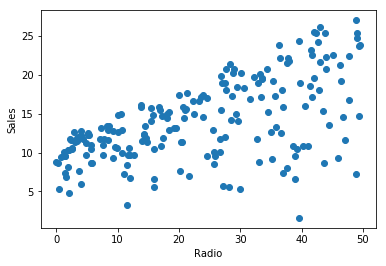

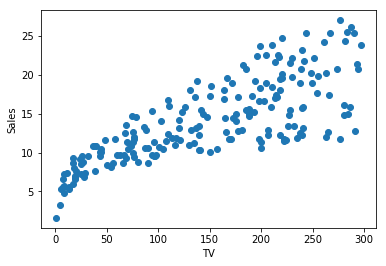

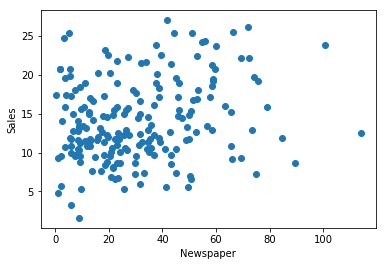

In [3]:
plt.scatter(data.Radio, data.Sales)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

plt.scatter(data.TV, data.Sales)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

plt.scatter(data.Newspaper, data.Sales)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

### Assumption 2: multivariate normality

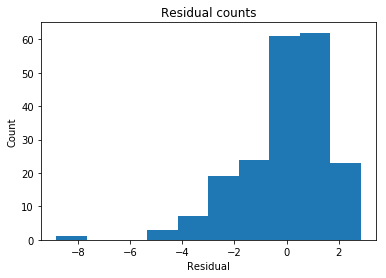

In [4]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption 3: homoscedasticity

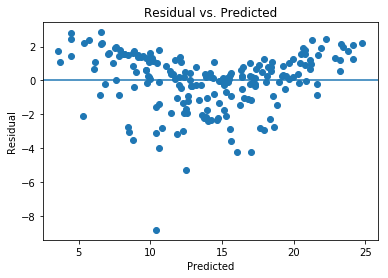

In [5]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption 4: low multicollinearity

In [6]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


# Drill: Fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality. Use the cell(s) below to see what you can do to fix it.

In [10]:
data['TV_sqrt'] = np.sqrt(data['TV'])
data['Radio_sqrt'] = np.sqrt(data['Radio'])
data['Newspaper_sqrt'] = np.sqrt(data['Newspaper'])

data['Sales_Sqrt'] = np.sqrt(data['Sales'])
data['Sales_Sq'] = data['Sales'] ** 2
data['Sales_Log'] = np.log(data['Sales'])

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,TV_sqrt,Radio_sqrt,Newspaper_sqrt,Sales_Sq,Sales_Log,Sales_Sqrt
0,1,230.100,37.800,69.200,22.100,15.169,6.148,8.319,488.410,3.096,4.701
1,2,44.500,39.300,45.100,10.400,6.671,6.269,6.716,108.160,2.342,3.225
2,3,17.200,45.900,69.300,9.300,4.147,6.775,8.325,86.490,2.230,3.050
3,4,151.500,41.300,58.500,18.500,12.309,6.427,7.649,342.250,2.918,4.301
4,5,180.800,10.800,58.400,12.900,13.446,3.286,7.642,166.410,2.557,3.592


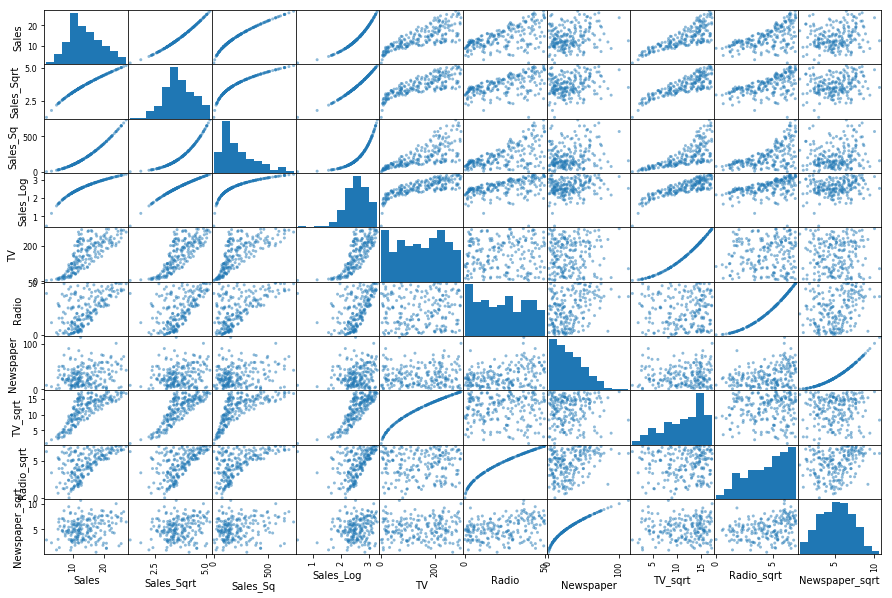

In [12]:
pd.plotting.scatter_matrix(data[['Sales','Sales_Sqrt', 'Sales_Sq', 'Sales_Log', 
                                 'TV','Radio','Newspaper', 'TV_sqrt', 'Radio_sqrt', 'Newspaper_sqrt']], figsize=(15, 10))
plt.show()

In [46]:
# Instantiate and fi our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper', 'TV_sqrt', 'Radio_sqrt', 'Newspaper_sqrt']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ -1.10669970e-02   2.63703308e-01   6.12758147e-04   1.20297292e+00
   -5.73316359e-01  -1.82579171e-02]]

Intercept: 
 [-1.5542754]

R-squared:
0.931661201253


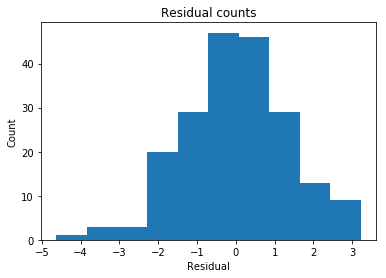

In [47]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

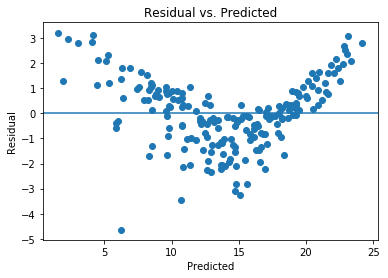

In [48]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Hmmmm... It seems still heteroscedasticity.